In [1]:
import os
import sys

sys.path.insert(0, os.path.join(os.path.abspath(""), "..", ".."))

import numpy as np
import matplotlib.pyplot as plt

from infovar.stats import entropy_estimators as ee

In [27]:
# Entropy computing

N = 1_000

#x = np.random.normal(0, 1, size = (N, 1))
x = np.random.uniform(0, 1, size = (N, 1))

h = ee.entropy(x, base = 2)
print(h)

#h_th = log(sqrt(2*pi*e)) / log(2)
h_th = np.log(0.5-0) / np.log(2)
print(h_th)

-1.0189284525567113
-1.0


In [24]:
# Impact of k

n_iter = 10
N = 10_000
sigma = 1

ks = np.arange(3, 21, 2)
hs = np.zeros((ks.size, n_iter))

for i, k in enumerate(ks) :
    
    for it in range(n_iter) :
        
        np.random.seed(it)
        x = np.random.normal(0, sigma, size = (N, 1))

        hs[i, it] = ee.entropy(x, k, base = 2)
        
h_th = np.log(sigma * np.sqrt(2*np.pi*np.e)) / np.log(2)

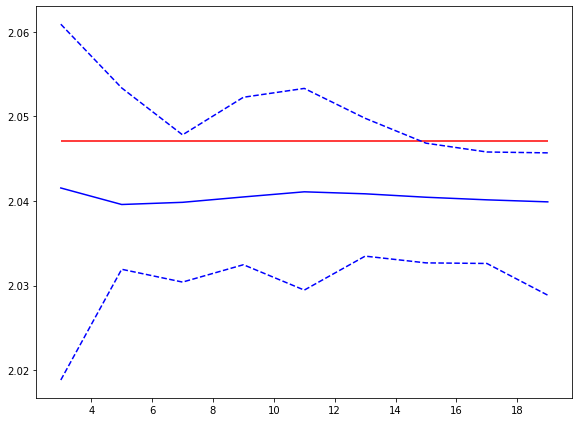

In [4]:
plt.figure(figsize = (1.5*6.4, 1.5*4.8))
plt.plot(ks, np.mean(hs, axis = 1), color = 'blue')
plt.hlines(h_th, ks[0], ks[-1], color = 'red')
plt.plot(ks, np.min(hs, axis = 1), linestyle = '--', color = 'blue')
plt.plot(ks, np.max(hs, axis = 1), linestyle = '--', color = 'blue');

In [5]:
# Impact of N

k = 3
n_iter = 10
sigma = 1

ns = 10**np.arange(2, 6)
hs = np.zeros((ns.size, n_iter))

for i, n in enumerate(ns) :
    
    for it in range(n_iter) :
        
        x = np.random.normal(0, sigma, size = (n, 1))

        hs[i, it] = ee.entropy(x, k, base = 2)
        
h_th = np.log(sigma * np.sqrt(2*np.pi*np.e)) / np.log(2)

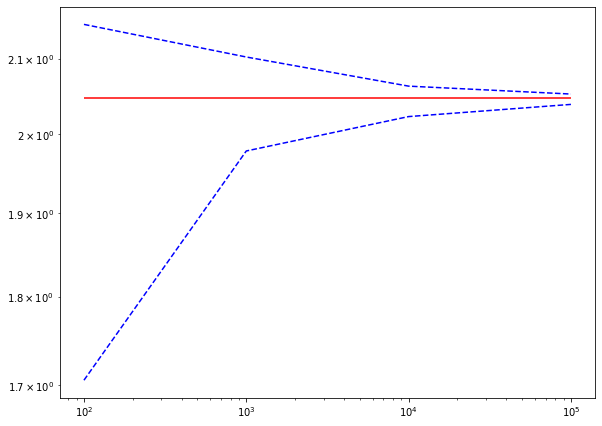

In [6]:
plt.figure(figsize = (1.5*6.4, 1.5*4.8))
plt.hlines(h_th, ns[0], ns[-1], color = 'red')
plt.semilogx(ns, np.min(hs, axis = 1), linestyle = '--', color = 'blue')
plt.semilogy(ns, np.max(hs, axis = 1), linestyle = '--', color = 'blue');

In [19]:
# Computing mutual information between two scalar variables

N = 10_000

np.random.seed(0)
x = np.random.normal(0, 1, size = (N, 1))
y = x**2

I = ee.mi(x, y, base = 2)
print(I)

Hx = ee.entropy(x, base = 2)
print(Hx)
Hy = ee.entropy(y, base = 2)
print(Hy)

11.475445512575597
2.018833052177283
2.0188330521351014


In [ ]:
# Computing mutual information between two scalar variables

N = 1_000

x = np.random.normal(0, 1, size = (N, 1))
y = x**2

I = ee.mi(x, y, base = 2)
print(I)

## Test for differents distributions

In [ ]:
N = 100_000

lamda = 1
data = np.random.laplace(0, lamda, size = (N, 1))

h = ee.entropy(data)
h_th = np.log2(2*np.e*lamda)

print('h', h)
print('h_th', h_th)

In [ ]:
N = 100_000

s = 1
data = np.random.logistic(0, s, size = (N, 1))

h = ee.entropy(data)
h_th = np.log2(s*np.e**2)

print('h', h)
print('h_th', h_th)

In [ ]:
N = 100_000

std = 1
x = np.random.uniform(0, np.sqrt(12)*std, size = (N, 1))
y = np.random.normal(0, std, size = (N, 1))

hx = ee.entropy(x)
hy = ee.entropy(y)

print('hx', hx)
print('hy', hy)